In [2]:
import numpy as np
from vedo import dataurl, Mesh, Points, show, settings
from vedo.pyplot import plot


settings.default_backend = "vtk"  # or k3d, ipyvtk, or 2d

<Mesh(0x174813df0) at 0x163c0c400>
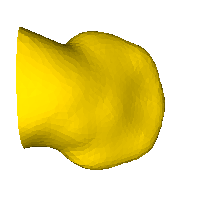

In [4]:
# Load a mesh of a mouse limb at 12 days of development
msh = Mesh(dataurl + "290.vtk")
msh


In [5]:
# Pick 100 points where we measure the value of a gene expression
ids = np.random.randint(0, msh.npoints, 100)
pts = msh.points()[ids]        # slice the numpy array
x = pts[:, 0]                  # x coordinates of the points
gene = np.sin((x+150)/500)**2  # we are making this up!



<Mesh(0x174813df0) at 0x163c0c400>
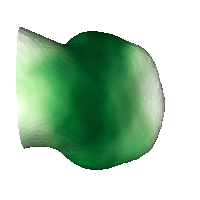

In [6]:
# Create a set of points with those values
points = Points(pts, r=10).cmap("Greens", gene)

# Interpolate the gene data onto the mesh, by averaging the 5 closest points
msh.interpolate_data_from(points, n=5).cmap("Greens").add_scalarbar()



In [7]:
# Create a graph of the gene expression as function of x-position
gene_plot = plot(x, gene, lw=0, title="Gene expression").as2d(scale=0.5)

# Show the mesh, the points and the graph
show(msh, points, gene_plot).close()